In [ ]:
!wget --no-check-certificate \
    http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz \
    -O food.tar.gz
!tar xzvf food.tar.gz

--2022-11-03 06:17:14--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-11-03 06:17:14--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food.tar.gz’

food.tar.gz           0%[                    ] 216.00K   292KB/s               ^C
food-101/
food-101/images/
food-101/images/beignets/
food-101/images/beignets/2885220.jpg
food-101/images/beignets/1814040.jpg
food-101/images/beignets/81202.jpg
food-101/images/beignets/1827892.jpg
food-101/images/beignets/2802124.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np
import pandas as pd
import tarfile
import wget
from keras.preprocessing import image
import numpy as np

In [ ]:
!pip install layer-sdk -qqq

     |████████████████████████████████| 190 kB 35.6 MB/s 
     |████████████████████████████████| 237 kB 67.7 MB/s 
     |████████████████████████████████| 4.1 MB 57.2 MB/s 
     |████████████████████████████████| 343 kB 52.8 MB/s 
     |████████████████████████████████| 132 kB 69.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.1 MB/s 
     |████████████████████████████████| 106 kB 57.4 MB/s 
     |████████████████████████████████| 35.3 MB 1.2 MB/s 
     |████████████████████████████████| 3.7 MB 59.4 MB/s 
     |████████████████████████████████| 2.4 MB 56.7 MB/s 
     |████████████████████████████████| 79 kB 8.7 MB/s 
     |████████████████████████████████| 9.8 MB 57.2 MB/s 
     |████████████████████████████████| 140 kB 74.9 MB/s 
     |████████████████████████████████| 2.4 MB 62.0 MB/s 
     |████████████████████████████████| 2.4 MB 45.9 MB/s 
     |████████████████████████████████| 182 kB 69.7 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████

In [2]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f757349161e3c5e68aea2be47593f83d3838938b25f364bcfb163c55ab386b64
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
Epoch 1/20
 235/2525 [=>............................] - ETA: 15:43 - loss: 4.6173 - categorical_accuracy: 0.0104

KeyboardInterrupt: ignored

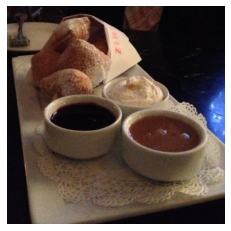

In [3]:
# #pip install layer-sdk -qqq
# import layer
# from layer.decorators import model, fabric,pip_requirements
# # Authenticate a Layer account 
# # The trained model will be saved there. 
# layer.login()
# Initialize a project, the trained model will be save under this project. 
# layer.init("image-classification")
# @pip_requirements(packages=["wget","tensorflow","keras"])
# @fabric("f-gpu-small")
# @model(name="food-vision")
def train():
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.callbacks import EarlyStopping
    import os
    import matplotlib.pyplot as plt 
    from PIL import Image
    import numpy as np
    import pandas as pd
    import tarfile
    import wget
    wget.download("http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz")
    food_tar = tarfile.open('food-101.tar.gz')
    food_tar.extractall('.') 
    food_tar.close()
    plt.imshow(Image.open("food-101/images/beignets/2802124.jpg"))
    plt.axis('off')
    # layer.log({"Sample image":plt.gcf()})
    base_dir = 'food-101/images'
    class_names = os.listdir(base_dir)
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   validation_split=0.2
                                   )
    validation_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
    image_size = (200, 200)
    training_set = train_datagen.flow_from_directory(base_dir,
                                                 seed=101,                                                 
                                                 target_size=image_size,
                                                 batch_size=32,
                                                 subset = "training",
                                                 class_mode='categorical')
    validation_set = validation_gen.flow_from_directory(base_dir, 
                                               target_size=image_size,
                                               batch_size=32, 
                                               subset = "validation",
                                               class_mode='categorical')
    model = Sequential([
            
    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (200, 200, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(101, activation='softmax')])
    model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
    callback = EarlyStopping(monitor='loss', patience=3)
    epochs=20
    history = model.fit(training_set,validation_data=validation_set, epochs=epochs,callbacks=[callback])
    metrics_df = pd.DataFrame(history.history)
    # layer.log({"Metrics":metrics_df})
    loss, accuracy = model.evaluate(validation_set)
    # layer.log({"Accuracy on test dataset":accuracy})
    metrics_df[["loss","val_loss"]].plot()
    # layer.log({"Loss plot":plt.gcf()})
    metrics_df[["categorical_accuracy","val_categorical_accuracy"]].plot()
    # layer.log({"Accuracy plot":plt.gcf()})
    return model

model = train()

In [ ]:
from keras.preprocessing import image
import numpy as np

!wget --no-check-certificate \
https://upload.wikimedia.org/wikipedia/commons/b/b1/Buttermilk_Beignets_%284515741642%29.jpg \
    -O /tmp/Buttermilk_Beignets_.jpg
test_image = image.load_img('/tmp/Buttermilk_Beignets_.jpg', target_size=(200, 200))
test_image = image.img_to_array(test_image)

test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

prediction = image_model.predict(test_image)

prediction[0][0]